In [117]:
#Notas: Checa cuanto tiempo haces rolling mean
# Checa si la data tiene que estar sorted para algo
import numpy as np
import matplotlib.pyplot as plt

In [118]:
np.random.seed(33)

T = 2000
t = np.arange(T+1) # observation times

r = np.random.randn(T)
phi = -0.4
theta = 0.6
d = 0.025

y = np.zeros(T+1)
y[0] = 100
y[1] = 100

# solo estac iniciando yo que pedo porque quiere que y1 tambien sea 100

delta_y = np.zeros(T)
delta_y[0] = y[1]-y[0]

for i in range(1,T):
    delta_y[i] = phi*(delta_y[i-1]-d)+r[i]+(theta*r[i-1])+d # verifica que este bien
    y[i+1] = y[i]+delta_y[i]
    

In [119]:
# Trend following
time_window = 50
time_window_long = 200
# Valores anteriores 200 y 50

acum = [0]
acum[0] = 0

ma = np.zeros(len(y))
ma_long = np.zeros(len(y))

w = np.zeros(len(y))
cash = np.zeros(len(y))

cash[0] = 10000

for i in range(len(y)-1):
    acum.append(acum[i] + y[i])
    ma[i] = y[i]
    ma_long[i] = y[i]
    
    if i > time_window:
        ma[i] = (acum[i] - acum[i-time_window])/(time_window)
        
    if i > time_window_long:
        ma_long[i] = (acum[i] - acum[i-time_window_long])/(time_window_long)
        
    if ma[i] == y[i]: # you do nothing
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > ma_long[i]:         
        w[i+1] = cash[i]/y[i]  + w[i]
        cash[i+1] = 0
        
    if ma[i] < ma_long[i]: # vendes
        cash[i+1] = w[i]*y[i] + cash[i]
        w[i+1] = 0

ma[i+1] = y[len(y)-1]
ma_long[i+1] = y[len(y)-1]
    

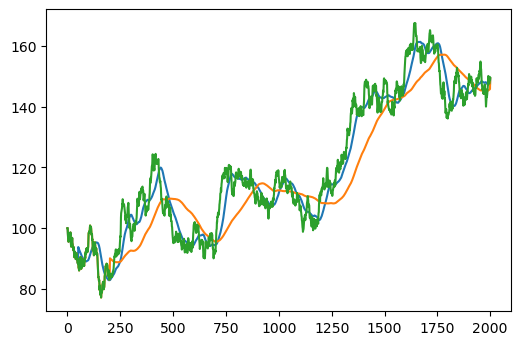

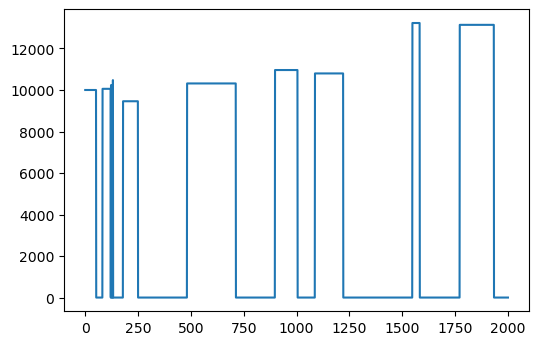

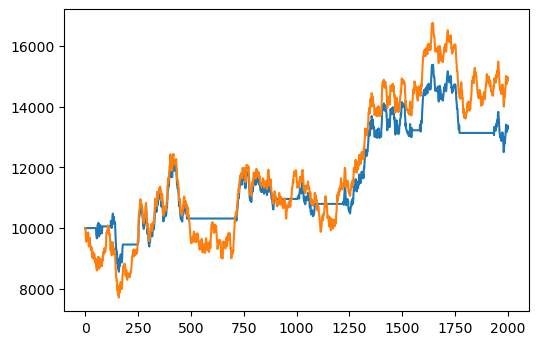

In [120]:
plot0 = plt.figure(0,figsize=(6,4), dpi=100)
plt.plot(t,ma)
plt.plot(t,ma_long)
plt.plot(t,y)

plot1 = plt.figure(1,figsize=(6,4), dpi=100)
plt.plot(t,cash)

strategy = [a*b for a,b in zip(w,y)]+ cash # No entendiste bien estoooo

plot2 = plt.figure(2,figsize=(6,4), dpi=100)
plt.plot(t, strategy)
plt.plot(t, cash[0]*y/y[0])

In [121]:
%precision %.2f
# What is the total return of my strategy? 
(strategy[-1]-strategy[0])/strategy[0]

0.3341970274716183

In [122]:
%precision %.2f
# What if I bought all the stocks I could on the first day and I kept them for the whole trading period?
(y[-1]-y[0])/y[0] 

0.49433234247442415

In [123]:
# Comparando training set con testing set

#Strategy
print("Strategy Train = ", (strategy[1400]-strategy[0])/strategy[0]) # Train
print("Strategy Test = ", (strategy[-1]-strategy[1401])/strategy[1401]) # Test

# Buy and Hold
print("BAH Train = ",(y[1400]-y[0])/y[0]) 
print("BAH Test = ",(y[-1]-y[1401])/y[1401]) 


Strategy Train =  0.3009846980337541
Strategy Test =  0.005950137229422278
BAH Train =  0.37277038365842147
BAH Test =  0.06777062521917075


(array([  2.,   3.,   2.,  12.,  13.,  18.,  26.,  45.,  65.,  81., 123.,
        127., 986., 118., 102.,  96.,  63.,  54.,  28.,  19.,   8.,   6.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.02914701, -0.02678256, -0.02441811, -0.02205366, -0.01968921,
        -0.01732476, -0.01496031, -0.01259586, -0.0102314 , -0.00786695,
        -0.0055025 , -0.00313805, -0.0007736 ,  0.00159085,  0.0039553 ,
         0.00631975,  0.0086842 ,  0.01104865,  0.0134131 ,  0.01577755,
         0.018142  ,  0.02050645,  0.0228709 ,  0.02523535,  0.0275998 ,
         0.02996425,  0.0323287 ,  0.03469315,  0.03705761,  0.03942206,
         0.04178651]),
 <a list of 30 Patch objects>)

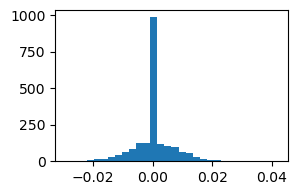

In [124]:
log_returns_trend = np.zeros(T)
for i in range(T):
    a = float(strategy[i])
    b = float(strategy[i+1])
    log_returns_trend[i] = np.log(b/a)
plot0 = plt.figure(0,figsize=(3,2), dpi=100)    
plt.hist(log_returns_trend, bins = 30)

In [125]:
# Performance indicators of trend [quitamos absolute de Var y ES, si esta bien o lo regresamos?????????????]
# Verifica valoreeeeeeees !!!!!!!!!!!!!!!! modificaste un poco es tambien le quitasre el menos
alpha = .95
sharp_trend = log_returns_trend.mean()/log_returns_trend.std()
Var_trend = np.quantile(log_returns_trend,1-alpha)
es_trend=np.mean([[v]  for v in log_returns_trend if v < Var_trend])
conditional_sharp_trend = log_returns_trend.mean()/es_trend

print("Performance Indicators of Trend Following Trading Strategy")
print("Sharp Ratio        = ",sharp_trend)
print("Value at Risk      = ",Var_trend)
print("Expected Shortfall = ",es_trend)
print("Conditional Sharp = ",conditional_sharp_trend)

Performance Indicators of Trend Following Trading Strategy
Sharp Ratio        =  0.02219486755469737
Value at Risk      =  -0.01114855002275748
Expected Shortfall =  -0.015895928765341433
Conditional Sharp =  -0.009069291816761723


In [ ]:
'''# Regula Trend following
# Trend following
time_window = 200

acum = [0]
acum[0] = 0

ma = np.zeros(len(y))
w = np.zeros(len(y))
cash = np.zeros(len(y))

cash[0] = 10000

for i in range(len(y)-1):
    acum.append(acum[i] + y[i])
    ma[i] = y[i]
    
    if i > time_window:
        ma[i] = (acum[i] - acum[i-time_window])/(time_window)
        
    if ma[i] == y[i]: # you do nothing
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < y[i]: #compras porque el trend debe ir al moving average         
        w[i+1] = cash[i]/y[i]  + w[i] # es el numero de acciones que tienes
        cash[i+1] = 0
        
    if ma[i] > y[i]: # vendes
        cash[i+1] = w[i]*y[i] + cash[i]
        w[i+1] = 0

ma[i+1] = y[len(y)-1]'''